In [194]:
import os
import json
import matplotlib.pyplot as plt

In [200]:
# Collect organizations and their co-occurences

orgs = []
texts = []
years = []
occurences = []

dir = 'json/'
files = os.listdir(dir)

for index, filename in enumerate(files):
    
    f = open(dir + filename)
    r = f.read()
    parsed = json.loads(r)
    
    # Set tags and remove excessive values

    tags = parsed[0]['story_tags']

    if len(tags) > 1000:
        continue

    # Set time

    try:
        year = int(parsed[0]['publish_date'].split(' ')[0].split('-')[0])
    except:
        continue

    # Collect organizations' names
    
    _names = []

    for tag in tags:
        if (tag['tag_set'] == 'cliff_organizations'):
            label = tag['tag']
            if label == 'EU': label = 'European Union'
            if label == 'E.U.': label = 'European Union'
            if label == 'IEA': label = 'International Energy Agency'
            if label == 'Exonn': label = 'Exonn Mobil'
            if label == 'ExonnMobil': label = 'Exonn Mobil'
            if label == 'U.S. Energy Information Administration': label = 'Energy Information Administration'
            if label == 'Massachusetts Institute of Technology': label = 'MIT'
            if label == 'U.N.': label = 'United Nations'
            if label == 'UN': label = 'United Nations'
            if label == 'EDF': label = 'Environmental Defense Fund'
            if label == 'Interior': label = 'Interior Department'
            if label == 'EIA': label = 'Enerfy Information Administration'
            if label == 'AP': label = 'Associated Press'
            if label == 'NOAA': label = 'National Oceanic and Atmospheric Administration'
            if label == 'U.S. Forest Service': label = 'Forest Service'
            if label == 'U.S. Department of Energy': label = 'Energy Department'
            if label == 'Department of Energy': label = 'Energy Department'
            if label == 'GE': label = 'General Electric'
            if label == 'Stanford': label = 'Stanford University'
            if label == 'NRDC': label = 'Natural Resources Defense Council'
            if label == 'EPA': label = 'Environmental Protection Agency'
            _names.append(label)

    # Collect by name

    # x -> years
    # y -> occurencies

    for n in _names:
        if n in orgs:
            
            index = orgs.index(n)
            texts[index] = texts[index] + _names
            occurences[index] += 1
            
            if year in years[index]:
                years[index][year] += 1
            else:
                years[index][year] = 1
                
        else:
            orgs.append(n)
            texts.append(_names)
            occurences.append(1)
            years.append({year: 1})


# Clean less citates organizations

for index, occurrence in reversed(list(enumerate(occurences))):

    min = 10

    if occurrence < min:
        orgs.pop(index)
        texts.pop(index)
        years.pop(index)
        occurences.pop(index)
    # else:
        # print()
        # print(index, occurrence, orgs[index])
        # print()

# order years by key in an array of tuples

for index, y in enumerate(years):
    sortedDict = dict( sorted(y.items(), key=lambda x: x[0]) )
    _temp = {}
    for k,v in sortedDict.items():
        _temp[k] = v
    years[index] = _temp

print(len(orgs), len(texts), len(years), len(occurences))

print(texts[0])
# print(years[0][:, 0])



379 379 379 379
['MIT', 'Energy Department', 'MIT', 'UC Santa Barbara', 'Harper Adams University', 'UCSB', 'PNNL', 'DOE Joint Genome Institute', 'Battelle’s Pacific Northwest National Laboratory', 'University of California, of Santa Barbara', 'MIT', 'Energy Information Administration', 'Washington Post', 'Shell', 'MIT', 'General Electric', 'Syracuse University', 'National Bureau of Economic Research', 'Center for Energy', 'Rochester Institute of Technology', 'French Economic Observatory', 'MIT', 'Kleiner Perkins Caufield & Byers', 'Sun Microsystems', 'United Nations', 'D', 'University of California', 'MIT', 'Natural Resources Defense Council', 'PG&E', 'Exelon Corp.', 'Exelon', 'Pacific Gas & Electric Co.', 'Argonne National Laboratory', 'Clean Air Task Force', 'University of California, Santa Cruz', 'state land commission', 'US Nuclear Waste Technical Review Board', 'European Union', 'United Nations', 'Environmental Protection Agency', 'European Union', 'MIT', 'Dogwood Alliance', 'Sout

In [201]:
# Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

slopes = []
colors = []

for year in years:

    y = list(year.values())
    x = list(year.keys())

    print()
    print(x, y)

    x = np.array(x).reshape((-1, 1))
    
    model = LinearRegression().fit(x, y)
    slope = model.coef_
    score = model.score(x, y)
    print('slope', slope)
    print('score', score)

    slopes.append(slope)

    if slope > .5:
        colors.append('red')
    else:
        if slope > -.5:
            colors.append('orange')
        else:
            colors.append('blue')



# x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# y = np.array([5, 20, 14, 32, 22, 38])

13, 2014, 2015, 2017] [3, 2, 2, 4, 1, 1]
slope [-0.28571429]
score 0.27874564459926043

[2011, 2012, 2013, 2015, 2016, 2017] [1, 2, 1, 1, 3, 6]
slope [0.60714286]
score 0.5338669950738482

[2012, 2013, 2014, 2015, 2016] [1, 5, 3, 3, 1]
slope [-0.2]
score 0.03571428571429791

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] [4, 3, 4, 5, 12, 11, 5, 2]
slope [0.28571429]
score 0.03590127150336753

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] [2, 5, 5, 13, 8, 10, 4, 8, 4]
slope [0.2]
score 0.024942263279443155

[2012, 2013, 2015, 2016, 2017, 2018, 2019] [3, 2, 6, 4, 1, 6, 1]
slope [-0.03623188]
score 0.0018870772946876224

[2011, 2013, 2014, 2015] [1, 1, 3, 5]
slope [0.97142857]
score 0.7506493506493507

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] [3, 10, 2, 2, 7, 2, 3, 4]
slope [-0.27380952]
score 0.05348296431098842

[2013, 2014, 2015, 2016, 2017] [2, 1, 3, 1, 5]
slope [0.6]
score 0.32142857142862824

[2012, 2015, 2016, 2017, 2018, 2019] [2, 1, 1, 1, 6, 1]
slope [0.1621621

In [202]:
# Term Frequency Matrix

import textacy

doc_term_matrix, dictionary = textacy.representations.build_doc_term_matrix(texts, tf_type="linear", idf_type="smooth")

 * creating mesh with size 62 62
 * filling mesh


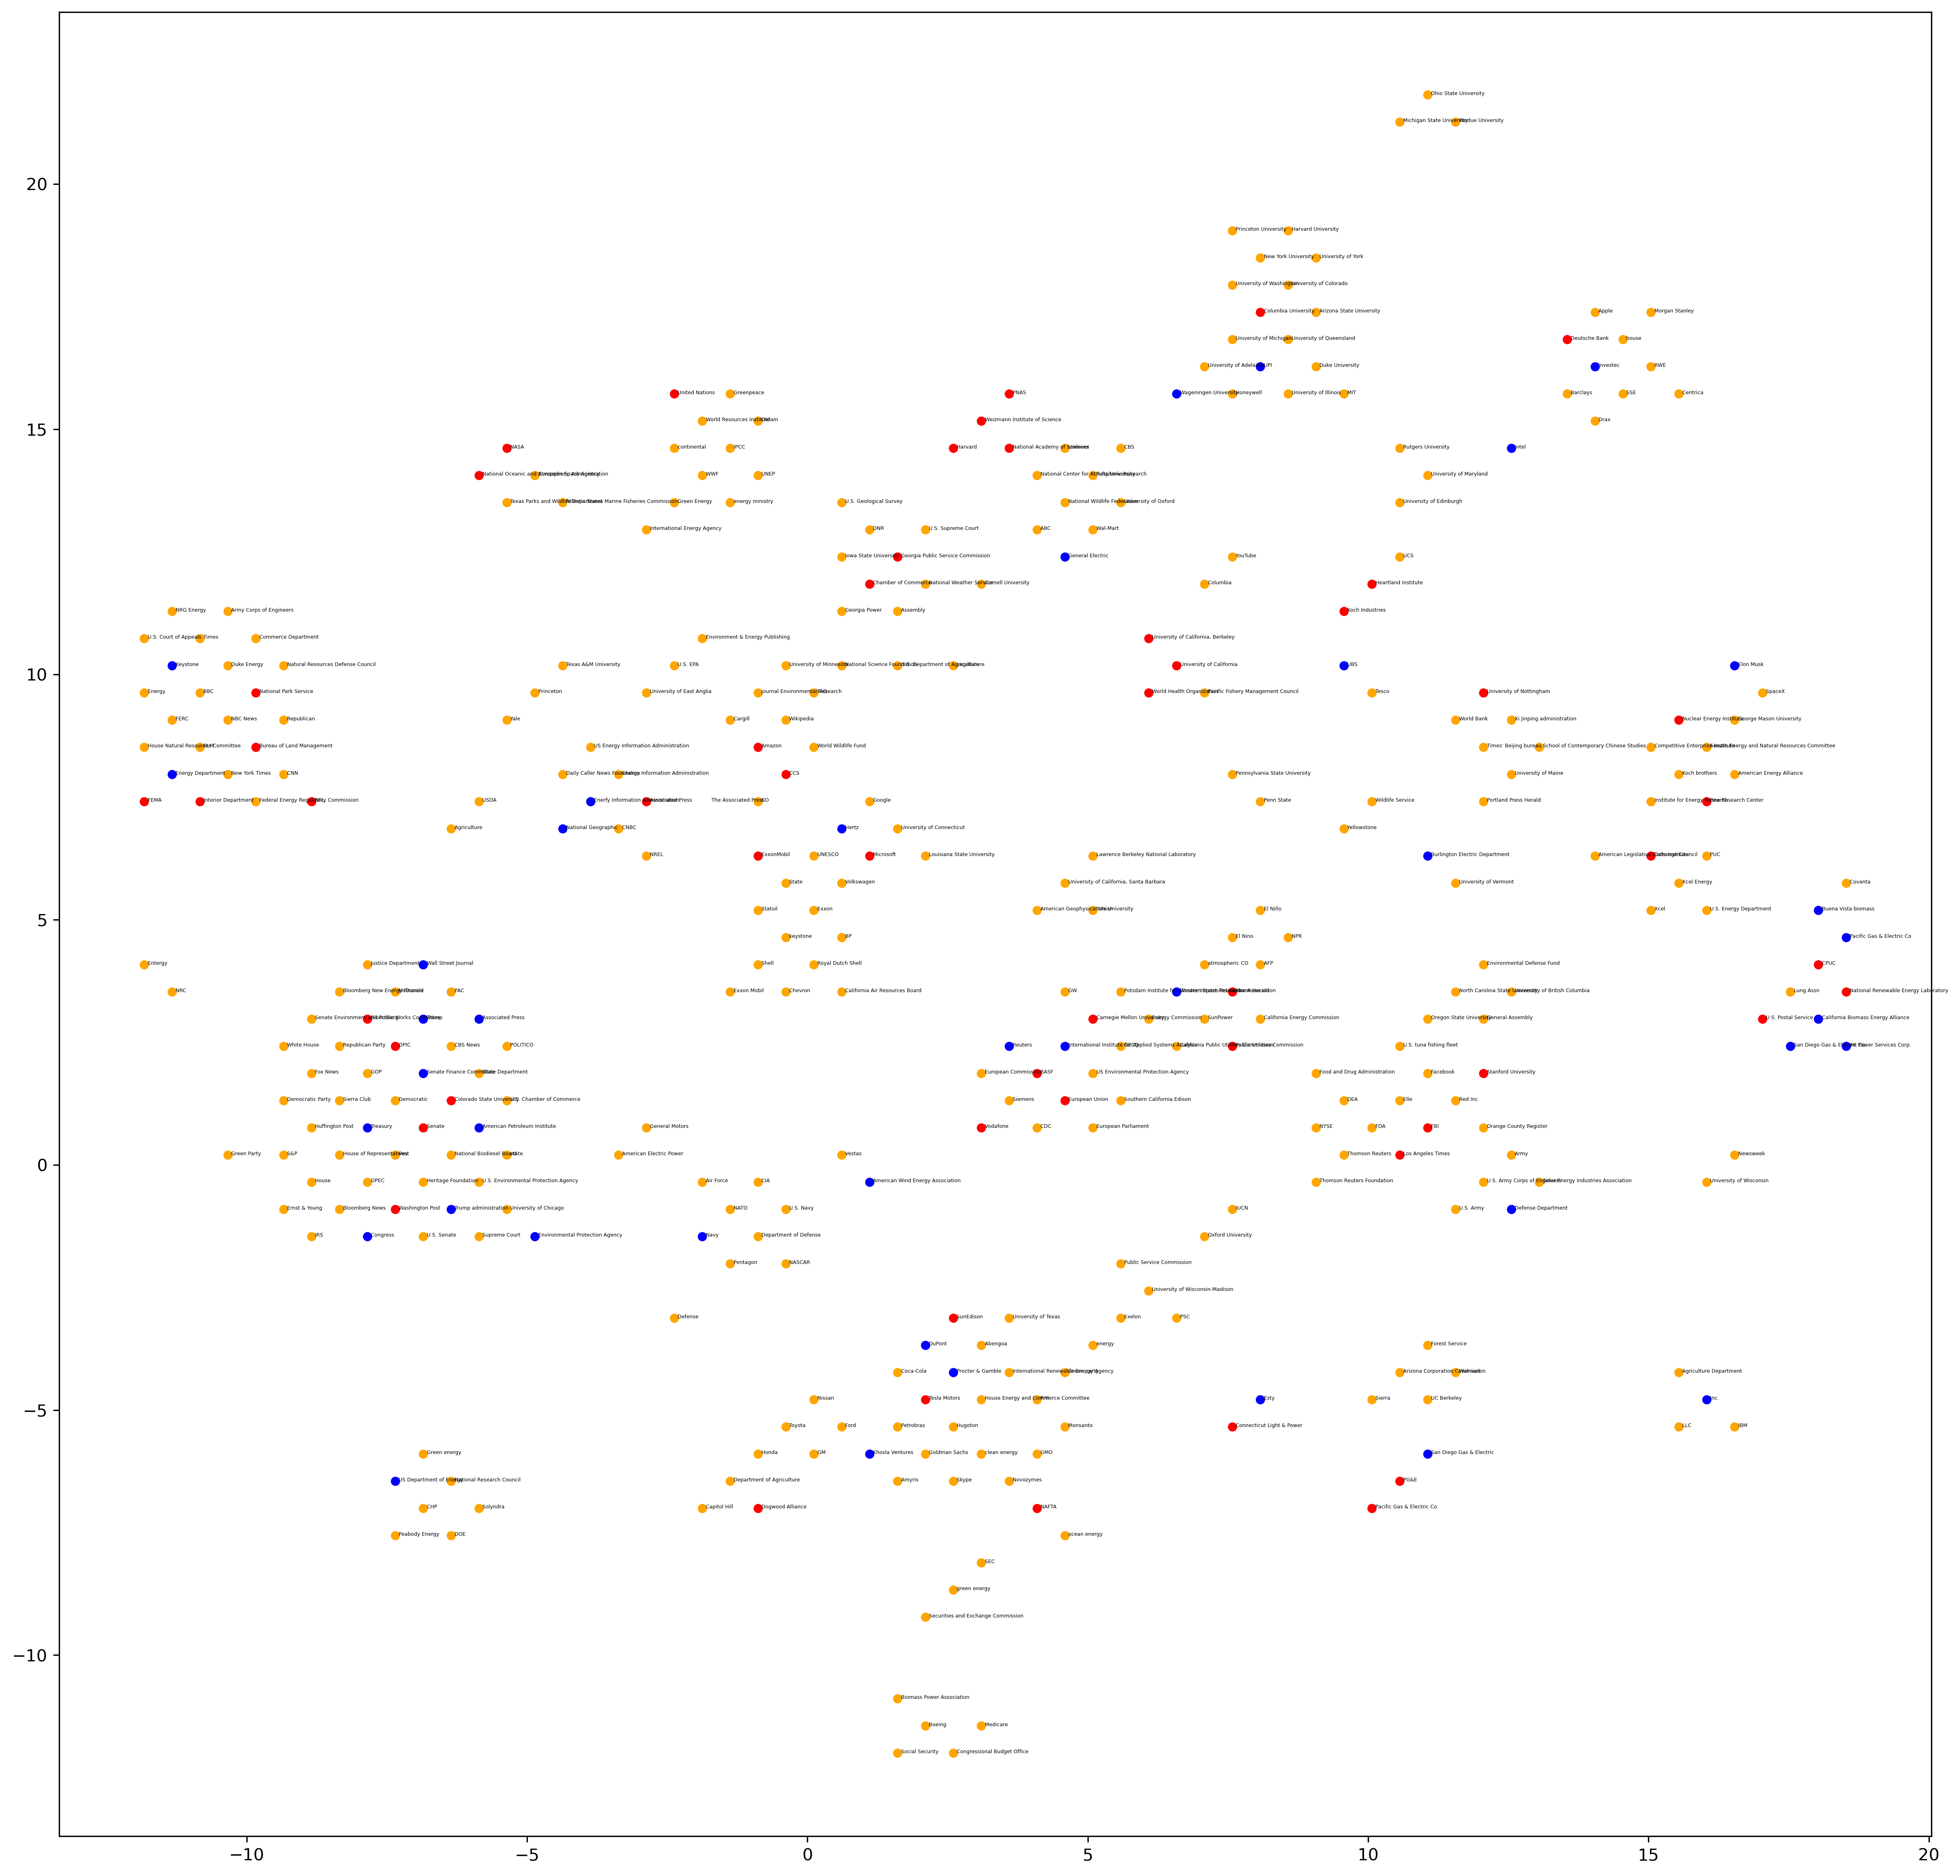

In [203]:
# UMAP

import umap
import matplotlib.pyplot as plt
from pointgrid import align_points_to_grid


reducer = umap.UMAP(n_components=2, n_neighbors=2, min_dist=0.01, metric='cosine')
# reducer = umap.UMAP(random_state=2, n_components=2, n_neighbors=2, min_dist=0.01, metric='hellinger')

embedding = reducer.fit_transform(doc_term_matrix)
embedding = align_points_to_grid(embedding)

x = embedding[:, 0]; y = embedding[:, 1]

plt.figure(figsize=(20,20), dpi=300)
plt.scatter(x, y, s=20, c=colors)

for i, txt in enumerate(orgs):
    text = plt.annotate(' ' + orgs[i], (x[i] + .03, y[i]))
    text.set_fontsize(3)